## SECTION 4 K-means clustering

In [20]:
corpus = ['milk bread bread bread',
         'break milk milk bread',
         'milk milk milk bread bread bread bread',
         'cat cat cat dog dog bark',
         'dog dog cat bark mew mew',
         'cat dog cat dog mew']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

matrix_input = tfidf.fit_transform(corpus)

In [22]:
matrix_input

<6x7 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters = 2)

In [25]:
# train model
# omitting 6th doc for test check
km.fit(matrix_input[:-1])

KMeans(n_clusters=2)

In [26]:
# clustering first 3 docs are similar as they have same label and same for cluster 2 (n=2)
km.labels_

array([0, 0, 0, 1, 1], dtype=int32)

In [27]:
# [5] or [-1:]
km.predict(matrix_input[5])

array([1], dtype=int32)

## Nearest Neighbors Clustering

In [40]:
corpus = open('dataset4.txt').read()

In [41]:
docs_list = corpus.split('\n')
docs_list

['milk bread bread bread',
 'bread milk milk bread',
 'milk milk milk bread bread bread bread',
 'cat cat cat dog dog bark',
 'dog dog cat bark mew mew',
 'cat dog cat dog mew',
 '']

In [42]:
docs = []
for i in docs_list:
    if i != '':
        docs.append(i)

docs

['milk bread bread bread',
 'bread milk milk bread',
 'milk milk milk bread bread bread bread',
 'cat cat cat dog dog bark',
 'dog dog cat bark mew mew',
 'cat dog cat dog mew']

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

matrix_input = tfidf.fit_transform(docs)

matrix_input

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [44]:
matrix_input.toarray()

array([[0.        , 0.9486833 , 0.        , 0.        , 0.        ,
        0.31622777],
       [0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.70710678],
       [0.        , 0.8       , 0.        , 0.        , 0.        ,
        0.6       ],
       [0.31209999, 0.        , 0.79048877, 0.52699251, 0.        ,
        0.        ],
       [0.34171416, 0.        , 0.28849858, 0.57699716, 0.68342833,
        0.        ],
       [0.        , 0.        , 0.65222614, 0.65222614, 0.38626691,
        0.        ]])

In [45]:
tfidf.vocabulary_

{'milk': 5, 'bread': 1, 'cat': 2, 'dog': 3, 'bark': 0, 'mew': 4}

In [46]:
from sklearn.neighbors import NearestNeighbors

nnc = NearestNeighbors()

nnc

NearestNeighbors()

In [47]:
# model training
nnc.fit(matrix_input)

NearestNeighbors()

In [54]:
# matrix_input[0] is reference point
# n = 2 is number of neighbors
# for n = 5, threshold t value is 1.0 (radius by default) and value of 1 and 2 label is <1 so they will make a cluster
# then the other 2 1.4 values will make a separate cluster, make one of them as ref pt.

nnc.kneighbors(matrix_input[0], 6)

(array([[0.        , 0.32036449, 0.45950584, 1.41421356, 1.41421356,
         1.41421356]]),
 array([[0, 2, 1, 3, 4, 5]]))

In [55]:
# gives neighbors that fall in 1.0 radius i.e. threshold t

nnc.radius_neighbors(matrix_input[0], radius = 1.0)

(array([array([0.        , 0.45950584, 0.32036449])], dtype=object),
 array([array([0, 1, 2])], dtype=object))

### 4.2.2 Agglomerative Clustering (Bottom Up)

In [56]:
corpus = open('dataset3.txt').read()

In [57]:
docs_list = corpus.split('\n')

In [58]:
docs = []
for i in docs_list:
    if i != '':
        docs.append(i)

docs

['milk bread bread bread : grocery',
 'bread milk milk bread : grocery',
 'milk milk milk bread bread bread bread : grocery',
 'cat cat cat dog dog bark : pets',
 'dog dog cat bark mew mew : pets',
 'cat dog cat dog mew cat : pets']

In [59]:
x = []
for d in docs:
    i, l = d.split(':')
    x.append(i)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vec = CountVectorizer()

In [69]:
matrix_x = vec.fit_transform(x)
matrix_x.toarray()

array([[0, 3, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 2],
       [0, 4, 0, 0, 0, 3],
       [1, 0, 3, 2, 0, 0],
       [1, 0, 1, 2, 2, 0],
       [0, 0, 3, 2, 1, 0]])

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
aggClus = AgglomerativeClustering()

In [71]:
# matrix_x is sparse matrix, matrix_x.toarray() is dense matrix
# in agglomerative clustering, dense matrix is required
aggClus.fit(matrix_x.toarray())

AgglomerativeClustering()

In [72]:
aggClus.labels_

array([1, 1, 1, 0, 0, 0])

### 4.2.3 Agglomerative Clustering with Parameters

In [73]:
corpus = open('dataset4.txt').read()

In [74]:
docs_list = corpus.split('\n')

In [75]:
docs = []
for i in docs_list:
    if i != '':
        docs.append(i)

docs

['milk bread bread bread',
 'bread milk milk bread',
 'milk milk milk bread bread bread bread',
 'cat cat cat dog dog bark',
 'dog dog cat bark mew mew',
 'cat dog cat dog mew']

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

matrix_input = tfidf.fit_transform(docs)

matrix_input

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [77]:
matrix_input.toarray()

array([[0.        , 0.9486833 , 0.        , 0.        , 0.        ,
        0.31622777],
       [0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.70710678],
       [0.        , 0.8       , 0.        , 0.        , 0.        ,
        0.6       ],
       [0.31209999, 0.        , 0.79048877, 0.52699251, 0.        ,
        0.        ],
       [0.34171416, 0.        , 0.28849858, 0.57699716, 0.68342833,
        0.        ],
       [0.        , 0.        , 0.65222614, 0.65222614, 0.38626691,
        0.        ]])

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
# affinity = euclidean (distance)
# linkage = type of linkage like ward, single
# n_clusters = number of clusters

aggClus = AgglomerativeClustering(n_clusters = 3)

In [80]:
aggClus.fit(matrix_input.toarray())

AgglomerativeClustering(n_clusters=3)

In [81]:
aggClus.labels_

array([1, 1, 1, 0, 2, 0])

### 4.2.4 Clustering UCI Repo dataset

In [95]:
import pandas as pd

In [96]:
corpus = pd.read_csv('dataset2.csv', encoding='latin-1', delimiter = '\n')

In [97]:
corpus

,"Review,,,,,,,,,,,,,,,,"
0,"Everything from the weather, staff, food, pro..."
1,"The hotel it is fantastic built by the sea, li..."
2,One dream! Cozy and comfortable Hotel! The b...
3,Hotel concept is hard to grasp. They communica...
4,"This is a wonderful hotel, for a romantic esca..."
...,...
396,"An extraordinary place! Amazing, architec..."
397,What a wonderful place to relax and enjoy...
398,Thank you for the best ever. And the best...
399,As you know we have just returned home after 5...


In [98]:
data = corpus.values

In [99]:
clean_data = [data[i][0] for i in range(0,len(data))]

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
vec = TfidfVectorizer()

In [102]:
matrix_input = vec.fit_transform(clean_data)

In [103]:
matrix_input

<401x2457 sparse matrix of type '<class 'numpy.float64'>'
	with 13465 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.cluster import KMeans

In [111]:
km = KMeans(n_clusters = 5)

In [112]:
km.fit(matrix_input)

KMeans(n_clusters=5)

In [113]:
km.labels_

array([4, 0, 0, 4, 0, 2, 0, 2, 0, 2, 3, 4, 3, 4, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 1, 4, 0, 0, 4, 0, 1, 0, 0, 0, 4, 2, 4, 2, 2, 0,
       4, 4, 1, 2, 4, 0, 4, 4, 2, 4, 2, 4, 4, 0, 4, 3, 2, 4, 4, 2, 2, 4,
       4, 2, 1, 4, 0, 1, 4, 4, 1, 4, 0, 4, 4, 0, 4, 2, 3, 4, 0, 2, 4, 4,
       4, 2, 4, 3, 4, 3, 3, 2, 3, 4, 3, 2, 4, 2, 1, 1, 1, 4, 4, 0, 0, 0,
       0, 0, 0, 1, 4, 1, 4, 4, 4, 3, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 1,
       4, 2, 4, 1, 4, 3, 0, 2, 3, 4, 2, 2, 1, 2, 3, 4, 2, 4, 3, 4, 0, 0,
       1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 4, 0, 2, 0, 0, 4, 0, 3, 1, 1, 1,
       4, 3, 1, 2, 1, 4, 3, 1, 1, 2, 0, 4, 2, 4, 1, 2, 4, 2, 3, 4, 0, 4,
       3, 1, 1, 1, 2, 4, 4, 3, 1, 4, 2, 4, 4, 0, 4, 0, 4, 0, 3, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 4, 2, 1, 4, 2, 4, 3, 4, 3, 4, 2, 4, 3, 1, 3, 4,
       4, 1, 4, 1, 3, 1, 1, 4, 1, 4, 4, 1, 3, 3, 2, 3, 1, 4, 0, 4, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 4, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,

### 4.1.7 Setting Clustering Parameters

In [114]:
from sklearn.cluster import KMeans

In [115]:
# PARAMETERS
# algorithm='auto' : effects on memory and computational cost, options are 'full' or 'elkan'
# copy_x=True : wether distances to be computed of original objects or their copies
# init='k-means++' : allowing algo to investigate most appropriate position to throw centroid at
# max_iter=300 : no. of iterations, repositioning of centroids
# n_clusters : no. of centroids thrown randomly
# n_init=10 : defines no. of attempts model will make to cluster the data, 10 times run with different centroids and then based on commulative score final output is generated
# n_jobs=None : deals with multiple threads, helps in reducing computational cost
# precompute_distances='auto' : reduces computational cost, uses precomputed distances , but memory cost increases (trade off)
# tol=0.0001 : tolerance, centroid pos. in current iter - centroid pos. in prev. iter = diff, if diff < tol then centroids are not getting too much modified and this level of accuracy is acceptable
# verbose=0 : kind of info you want when algo runs, if high val then it means we want more info, 0 means we just want output and no other info


km = KMeans(n_clusters=3, max_iter=100, tol=0.01 )
km

KMeans(max_iter=100, n_clusters=3, tol=0.01)

In [116]:
from sklearn.neighbors import NearestNeighbors

In [11]:
# PARAMETERS
# algorithm='auto' : options are 'ball_tree' or 'kd_tree' or 'brute', effects comp. cost
# leaf_size=30 : for ball tree or KD tree, effects comp. cost and memory cost
# p=2 : 2 for euclidean distan, 1 for manhattan distance
# p, metric, metric_params are all related
# n_jobs=None : deals with multiple threads, helps in reducing computational cost
# n_neighbors=5 : no. of neighbors to use for KNeighbors query
# radius=1.0 : radius in which neigbors are to be found


nn = NearestNeighbors()
nn

NearestNeighbors()

### 4.2.5 Calculating suitable value of K

In [117]:
import pandas as pd

corpus = pd.read_csv('dataset2.csv', encoding='Latin-1', delimiter='\n')

raw_data = corpus.values

dataset = [raw_data[i][0] for i in range(0, len(raw_data))]

In [118]:
import numpy as np

# centroids near 0, 10, 20
docs = np.array([[1,1], [1,3], [2,4], [3,1], [5,3], 
                 [11,10], [15,12], [12,12], [14,10], [11,13],
                 [20,22], [23,21], [24,20], [21,23], [24,25]])

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 100)

matrix_input = vec.fit_transform(dataset)

In [120]:
from sklearn.cluster import KMeans

In [121]:
km1 = KMeans(n_clusters=1)
km2 = KMeans(n_clusters=2)
km3 = KMeans(n_clusters=3)
km4 = KMeans(n_clusters=4)
km5 = KMeans(n_clusters=5)

In [122]:
km1.fit(docs)
km2.fit(docs)
km3.fit(docs)
km4.fit(docs)
km5.fit(docs)

KMeans(n_clusters=5)

In [124]:
# squared error
km1.inertia_, km2.inertia_, km3.inertia_, km4.inertia_, km5.inertia_

(2049.7333333333336,
 529.4000000000001,
 66.80000000000001,
 53.13333333333333,
 40.56666666666666)

In [66]:
from matplotlib import pyplot as plt

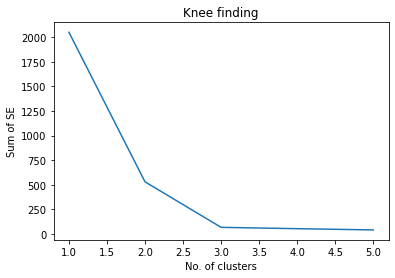

In [68]:
plt.figure()
# x-axis : n_clusters    y-axis : inertia_
plt.plot([1, 2, 3, 4, 5], [km1.inertia_, km2.inertia_, km3.inertia_, km4.inertia_, km5.inertia_])
plt.xlabel('No. of clusters')
plt.ylabel('Sum of SE')
plt.title('Knee finding')
plt.show()

In [60]:
dic = {}
for i in range(1, 21):
    km = KMeans(n_clusters = i)
    km.fit(matrix_input)
    dic[i] = km.inertia_

In [61]:
#dic

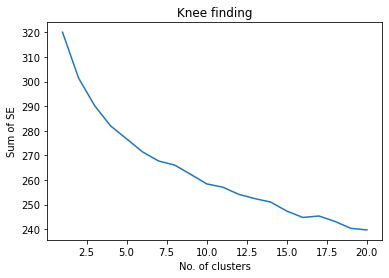

In [62]:
plt.figure()
# x-axis : n_clusters    y-axis : inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Sum of SE')
plt.title('Knee finding')
plt.show()

### Assignment

In [174]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [175]:
corpus = open('dataset2.csv', encoding='latin-1').read()

In [176]:
docs_list = corpus.split('\n')

In [177]:
# to remove '' at the end of file
docs = []
for i in docs_list:
    if i != '':
        docs.append(i)

In [178]:
vec = TfidfVectorizer()

In [179]:
matrix_input = vec.fit_transform(docs)

In [187]:
nn1 = NearestNeighbors(radius=0.25)
nn2 = NearestNeighbors(radius=0.5)
nn3 = NearestNeighbors(radius=0.75)
nn4 = NearestNeighbors(radius=1.0)
nn5 = NearestNeighbors(radius=1.5)

In [188]:
nn1.fit(matrix_input)
nn2.fit(matrix_input)
nn3.fit(matrix_input)
nn4.fit(matrix_input)
nn5.fit(matrix_input)

NearestNeighbors(radius=1.5)

In [195]:
nn1.radius_neighbors(matrix_input[0])

(array([array([0.])], dtype=object), array([array([0])], dtype=object))

In [194]:
nn2.radius_neighbors(matrix_input[0])

(array([array([0.])], dtype=object), array([array([0])], dtype=object))

In [193]:
nn3.radius_neighbors(matrix_input[0])

(array([array([0.])], dtype=object), array([array([0])], dtype=object))

In [192]:
nn4.radius_neighbors(matrix_input[0])

(array([array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])],
       dtype=object),
 array([array([  0,  28, 193, 202, 213, 227, 289, 412, 414, 422, 448, 520, 561])],
       dtype=object))

In [207]:
nn5.radius_neighbors(matrix_input[0])

(array([array([0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.        , 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.4142135